# Task
Do something with airquality.csv, located at https://vincentarelbundock.github.io/Rdatasets/datasets.html 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('airquality.csv')
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']]

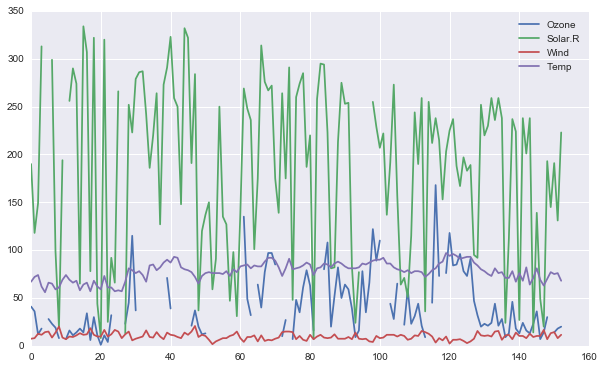

In [22]:
# Plot raw data
fig = plt.figure(figsize=(10,6))
plt.plot(data['Ozone'], label="Ozone")
plt.plot(data['Solar.R'], label="Solar.R")
plt.plot(data['Wind'], label="Wind")
plt.plot(data['Temp'], label="Temp")
plt.legend(loc='upper right')

In [25]:
# Make monthly data
monthly = data.groupby('Month', as_index=False).agg({'Ozone': 'mean',
                           'Solar.R': 'mean', 
                           'Wind': 'mean', 
                           'Temp': 'mean'})


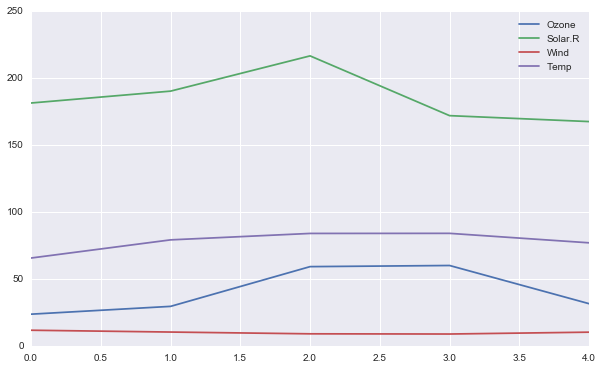

In [33]:
# Plot
fig = plt.figure(figsize=(10,6))
plt.plot(monthly['Ozone'], label="Ozone")
plt.plot(monthly['Solar.R'], label="Solar.R")
plt.plot(monthly['Wind'], label="Wind")
plt.plot(monthly['Temp'], label="Temp")
plt.legend(loc='upper right')

In [40]:
monthly.rename(columns={'Solar.R':'SolarR'}, inplace=True)

In [43]:
# Combined model

import statsmodels.formula.api as smf

model = smf.ols(formula='Ozone ~ SolarR + Wind + Temp', data=monthly)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     31.98
Date:                Wed, 10 Feb 2016   Prob (F-statistic):              0.129
Time:                        12:53:35   Log-Likelihood:                -9.3903
No. Observations:                   5   AIC:                             26.78
Df Residuals:                       1   BIC:                             25.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    555.2094    128.603      4.317      0.1

In [113]:
# Individual contributions of factors
# (By far it's Wind, then Temp, then SolarR)

import statsmodels.formula.api as smf

model = smf.ols(formula='Ozone ~ SolarR', data=monthly)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                 -0.156
Method:                 Least Squares   F-statistic:                    0.4604
Date:                Wed, 10 Feb 2016   Prob (F-statistic):              0.546
Time:                        13:42:09   Log-Likelihood:                -20.469
No. Observations:                   5   AIC:                             44.94
Df Residuals:                       3   BIC:                             44.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -19.9034     89.733     -0.222      0.8

In [50]:
# Look at Ozone predictions
c = result.params
monthly['Prediction'] = (c['Intercept'] + 
                         monthly['SolarR'] * c['SolarR'] + 
                         monthly['Wind'] * c['Wind'] + 
                         monthly['Temp'] * c['Temp'])

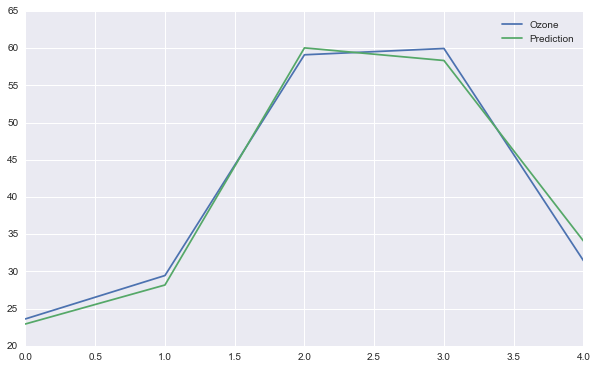

In [52]:
fig = plt.figure(figsize=(10,6))
plt.plot(monthly['Ozone'], label="Ozone")
plt.plot(monthly['Prediction'], label="Prediction")
plt.legend(loc='upper right')

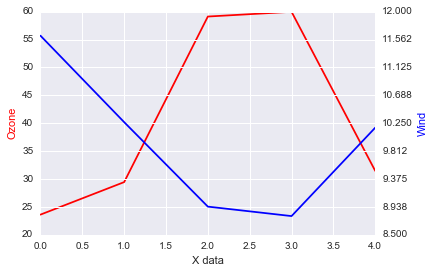

In [77]:
# Look at the relationship between Wind and Ozone (about the only thing that matters)
fig = plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(monthly['Ozone'], label="Ozone", color="red")
ax2.plot(monthly['Wind'], label="Wind", color="blue")

# align tickmarks
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))

ax1.set_xlabel('X data')
ax1.set_ylabel('Ozone', color='red')
ax2.set_ylabel('Wind', color='blue')